# 1. Check that you can run the code block below without errors:

The code block below imports every package we will use during the course.
To run it, just click on it and hit Ctrl+Enter.
If there is an error, you need to install the corresponding package. If you think you already installed it, you may have multiple Python environments, and you need to make sure that the package is installed in an environment that's available to this notebook.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from numpy.random import normal
import math

from matplotlib import pyplot as plt

import fredapi
import wrds

import arch
from arch.__future__ import reindexing

import scipy.stats
from scipy.optimize import minimize

from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

Import config information

In [13]:
import os
from dotenv import load_dotenv
load_dotenv();

# 2. Set up your access to WRDS, and check that you can produce the figure below:

You need to edit the code block below to specify your own username (mine is wmann). Be sure it is still in quotes. Then when you run the code, it should prompt you for a password (and might give you the option to save it for future use). And then it should run the rest of the code and produce the figure.

Loading library list...
Done


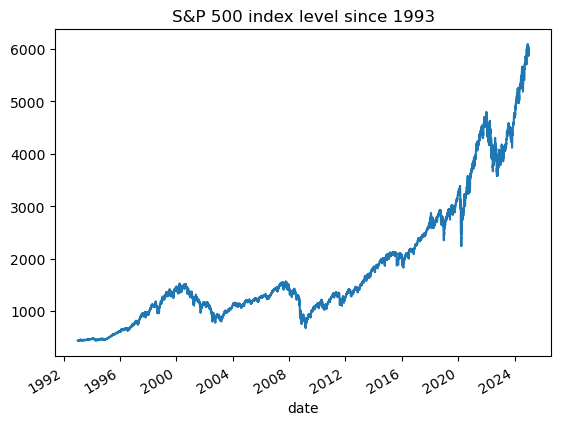

In [10]:
wrds_conn = wrds.Connection( wrds_username=os.environ['WRDS_USERNAME'] )
spindx = wrds_conn.raw_sql("select caldt, spindx from crsp_a_indexes.dsp500")
# Remember to close your connection when finished, or WRDS will start throttling you!
wrds_conn.close()
spindx['date'] = pd.to_datetime(spindx['caldt'])
spindx = spindx.set_index('date')
spindx['1993':].plot(legend=False,title="S&P 500 index level since 1993");

# 3. Set up your API key for the FRED system, and check that you can produce the figure below:

The [FRED system](https://fred.stlouisfed.org/) operated by the St Louis Fed is a standard source of economic data and we will use it extensively.
They offer free API access, but you have to have a key to access the system.
A key is just a string of letters and numbers that they will generate for you, much like a password.
You will need to obtain your own API key.
There is some information about it this process at [this link](https://fred.stlouisfed.org/docs/api/api_key.html).

Then, in examples that we run using FRED data, you will need to replace my key with yours in order for the code to run.
I always load my key using a code block like the first line below.
My key is saved in a file on my computer, and this code reads it in and then saves it to a string variable named Fred_API_key_string.
That way, I can share the contents of this notebook with anyone, without revealing my key.

You could follow a setup like this, but if you're not planning on posting your code publicly, it is much easier to just replace the code block with one that directly writes out your key. For example, suppose your key turns out to be 1234567890. Then you can replace the first line below with...

Fred_API_key_string = '1234567890'

...and everything should work fine. Notice that you need to have quotes around the key. If you did it correctly, the code block will produce the figure below.

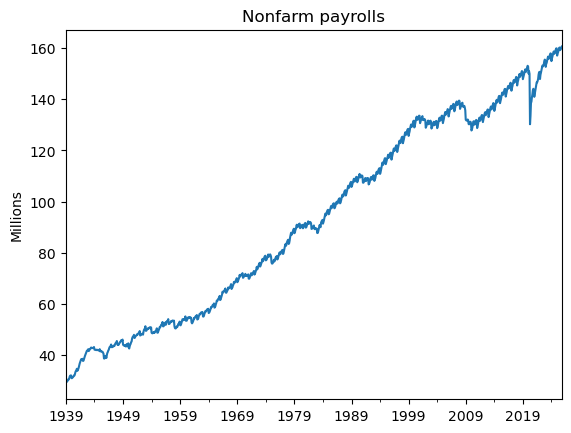

In [9]:
import fredapi
PAYNSA  = fredapi.Fred().get_series('PAYNSA')
PAYNSA = PAYNSA / 1000
PAYNSA.plot(title="Nonfarm payrolls",ylabel=("Millions"));